# SQL 프로그래밍

* 스토어드 프로시저는 MySQL에서 프로그래밍 기능이 필요할 때 사용하는 데이터베이스 개체
* SQL프로그래밍은 기본적으로 스토어드 프로시저 안에 만들어야 함

In [ ]:
# 스토어드 프로시저 구조
# 스토어드 프로시저의 코딩 부분
DELIMITER $$
CREATE PROCEDURE 스토어드_프로시저_이름()
BEGIN
이 부분에 SQL 프로그래밍 코딩
END $$              # 스토어드 프로시저 종료
DELIMITER;           # 종료 문자를 다시 세미콜론(;)으로 변경
CALL 스토어드_프로시저_이름()            # 스토어드 프로시저 실행

* 일반적으로, 구분 문자(DELIMTER)는 $$를 많이 사용하지만, 원한다면 /, &, @등을 사용해도 상관없다.
* 다른 기호와 중복을 방지하기 위해 기호 2개를 연속으로 사용하는 것이 좋다.

## IF문

* 조건문에 가장 많이 사용되는 프로그래밍 문법 중 하나이다.

### IF문의 기본 형식

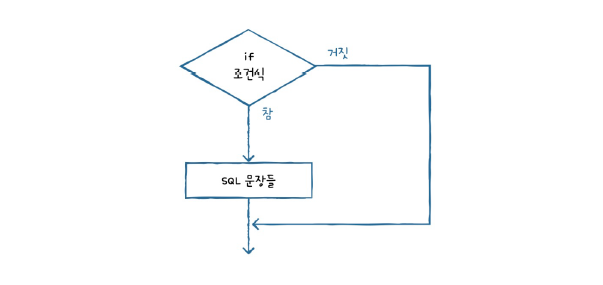

In [ ]:
# 기본 IF문의 형식
IF <조건식> THEN
SQL 문장들
END IF;

* 두 문장 이상이 처리 되어야 할 때, BEGIN ~ END로 묶어줘야 한다.

In [ ]:
# BEGIN ~ END구문의 예
DROP PROCEDURE IF EXISTS ifProc1;
DELIMITER $$
# 스토어드 프로시저의 이름을 ifProc1()로 저장
CREATE PROCEDURE ifProc1()
BEGIN
	IF 100 = 100 THEN
		SELECT '100은 100과 같습니다.';
	END IF;
END $$
DELIMITER;
CALL ifProc1;

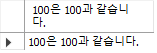

### IF ~ ELSE문

* 조건에 따라 다른 부분을 수행한다.

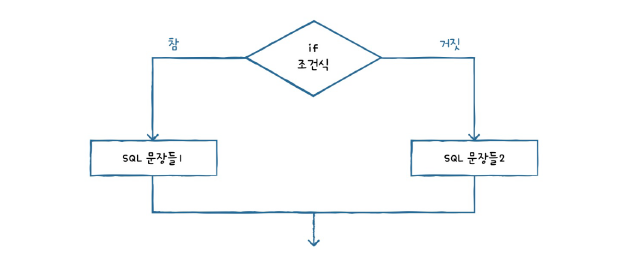

* 변수는 DECLARE로 선언하고 SET으로 값을 대입한다.

In [ ]:
# IF ~ ELSE문 예시
# IF~ELSE문은 조건식이 참일 때와 거짓일 때 다른 부분이 실행된다
DROP PROCEDURE IF EXISTS ifProc2;
DELIMITER $$
CREATE PROCEDURE ifProc2()
BEGIN
    # DECLARE 예약어를 사용해서 myNum변수를 선언, 제일 뒤에 변수의 데이터 형식을 INT로 지정
	DECLARE myNum INT;
    SET myNum = 200;
    IF myNum = 100 THEN
		SELECT '100입니다.';
	ELSE
		SELECT '100이 아닙니다.';
	END IF;
END $$
DELIMITER ;
CALL ifProc2();

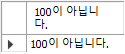

### IF문의 활용

* 아이디가 APK(에이핑크)인 회원의 데뷔 일자가 5년이 넘었는지 확인해보고 5년이 넘었으면 축하 메시지를 출력해본다.

In [ ]:
# IF문의 활용
DROP PROCEDURE IF EXISTS ifProc3;
DELIMITER $$
CREATE PROCEDURE ifProc3()
BEGIN
	DECLARE debutDate DATE;
    DECLARE curDate DATE;
    DECLARE days INT;
    # APN(에이핑크)의 데뷔 일자(debut_date)를 추출하는 SELECT문
    # INTO변수 -> 결과를 변수에 저장하는 역할을 한다, 에이핑크의 데뷔 일자가 debutDate에 저장된다
    SELECT debut_date INTO debutDate
		FROM market_db.member
        WHERE mem_id = 'APN';

    # CURRENT_DATE() 함수로 현대 날짜를 curDATE에 저장
	SET curDATE = CURRENT_DATE();
    # DATEDIFF()함수로 데뷔 일자 부터 현재 날짜까지 일수를 days에 저장
    SET days = DATEDIFF(curDATE, debutDate);
    
    IF (days/365) >= 5 THEN
		SELECT CONCAT('데뷔한 지 ', days, '일이나 지났습니다. 핑순이들 축하합니다!');
	ELSE
		SELECT '데뷔한 지 ' + days + '일밖에 안되었네요. 핑순이들 화이팅~';
	END IF;
END $$
DELIMITER ;
CALL ifProc3();

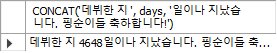

#### 날짜 관련 함수

* **CURRENT_DATE()**: 오늘 날짜를 알려준다.
* **CURRENT_TIMESTAMP()**: 오늘 날짜 및 시간을 함께 알려준다.
* **DATEDIFF(날짜1, 날짜2)**: 날짜2부터 날짜1까지 일수로 몇일인지 알려준다.

## CASE문

* 여러 가지 조건 중에서 선택해야 하는 경우에 사용

### CASE문의 기본 형식

* IF문은 참 아니면 거짓 두 가지만 있기 때문에 2중 분기라는 용어를 사용한다.
* CASE문은 2가지 이상의 여러 가지 경우일 때 처리가 가능하므로 '다중 분기'라고 부른다.

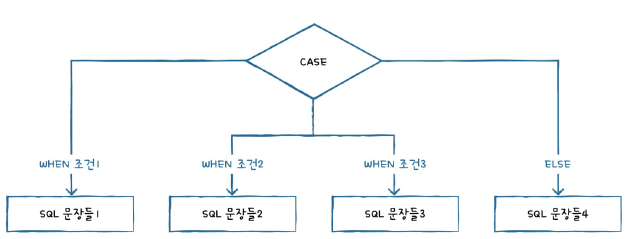

* SQL의 CASE문은 다른 프로그래밍 언어의 SWITCH ~ CASE문과 비슷한 기능을 한다.

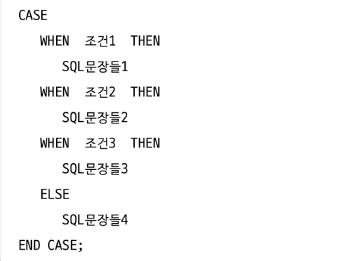

* CASE와 END CASE 사이에는 여러 조건들을 넣을 수 있다.
* WHEN 다음에 조건이 나오는데, 조건이 여러 개라면 WHEN을 여러 반복한다. 그리고 모든 조건에 해당되지 않으면 마지막 ELSE부분을 수행한다.

* 90점 이상은 A, 80점 이상은 B, 70점 이상은 C, 60점 이상은 D, 60점 이상은 F로 나누는 경우 CASE문을 사용할 수 있다.

In [ ]:
# CASE문 예시
DROP PROCEDURE IF EXISTS caseProc;
DELIMITER $$
CREATE PROCEDURE caseProc()
BEGIN
	DECLARE point INT;
    DECLARE credit CHAR(1);
    SET point = 88;
    
    CASE
	WHEN point >= 90 THEN
		SET credit = 'A';
	WHEN point >= 80 THEN
		SET credit = 'B';
	WHEN point >= 70 THEN
		SET credit = 'C';
	WHEN point >= 60 THEN
		SET credit = 'D';
	ELSE
		SET credit = 'F';
	END CASE;
    SELECT CONCAT('취득점수==>', point), CONCAT('학점==>', credit);
END $$
DELIMITER ;
CALL caseProc();

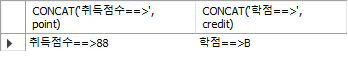

### CASE문의 활용

* 인터넷 마켓 데이터베이스의 회원들은 물건을 구매한다. 회원들의 총 구매액을 계산해서 회원의 등급을 다음과 같이 4단계로 나누려 한다.

|총 구매액|회원 등급|
|---|---|
|1500 이상|최우수고객|
|1000 ~ 1499|우수고객|
|1 ~ 999|일반고객|
|0 이하(구매한적 없음)|유령고객|

In [ ]:
# 회원별로 총구맥 구하기
# GROUP BY활용
SELECT mem_id, SUM(price*amount) "총 구매액"
FROM buy
GROUP BY mem_id;

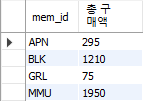

In [ ]:
# ORDER BY를 이용하여 총 구매액이 많은대로 정렬
SELECT mem_id, SUM(price*amount) "총 구매액"
FROM buy
GROUP BY mem_id
ORDER BY SUM(price*amount) DESC;

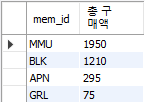

In [ ]:
# 내부조인을 사용하여 회원의 이름 출력
SELECT B.mem_id, M.mem_name, SUM(price*amount) "총 구매액"
FROM buy B
INNER JOIN member M
ON B.mem_id = M.mem_id
GROUP BY B.mem_id
ORDER BY SUM(price*amount) DESC;

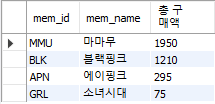

In [ ]:
# 외부조인을 사용하여 구매하지 않은 회원의 아이디와 이름 출력
# 구매 테이블에는 구매한 적이 없어도 회원 테이블에 있는 회원은 모두 출력
# RIGHT OUTER JOIN 사용
SELECT M.mem_id, M.mem_name, SUM(price*amount) "총 구매액"
FROM buy B
RIGHT OUTER JOIN member M
ON B.mem_id = M.mem_id
GROUP BY M.mem_id
ORDER BY SUM(price*amount) DESC;

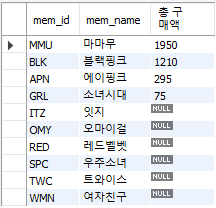

In [ ]:
# CASE문을 사용하여 총 구매액에 따라 회원등급을 구분
# 다음의 구문을 콤마로 구분하여 SELECT열의 마지막에 포함시키면 된다
CASE
WHEN (총구매액 >= 1500) THEN '최우수고객'
WHEN (총구매액 >= 1000) THEN '우수고객'
WHEN (총구매액 >= 1) THEN '일반고객'
ELSE '유령고객'
END

In [ ]:
# 전체 구문
SELECT M.mem_id, M.mem_name, SUM(price*amount) "총 구매액",
	CASE
		WHEN (SUM(price*amount) >= 1500) THEN '최우수고객'
		WHEN (SUM(price*amount) >= 1000) THEN '우수고객'
		WHEN (SUM(price*amount) >= 1) THEN '일반고객'
		ELSE '유령고객'
    # CASE구문에 대한 컬럼명을 회원등급으로 지정
	END "회원등급"
FROM buy B
RIGHT OUTER JOIN member M
ON B.mem_id = M.mem_id
GROUP BY M.mem_id
ORDER BY SUM(price*amount) DESC;

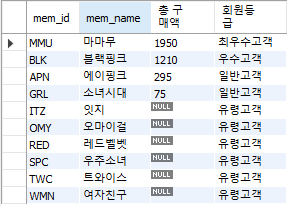

## WHILE문

* 필요한 만큼 계속 같은 내용을 반복하게 해주는 명령어

### WHILE문의 기본 형식

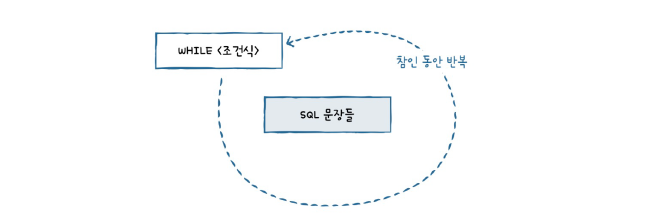

* SQL의 WHILE문은 일반 프로그래밍 언어의 WHILE문과 같은 개념이다.

In [ ]:
# WHILE문의 기본 형식
WHILE <조건식> DO
    SQL 문장들
END WHILE;

In [ ]:
# WHILE문 예시: 1~100까지의 값을 모두 더하는 간단한 기능 구현
DROP PROCEDURE IF EXISTS whileProc;
DELIMITER $$
CREATE PROCEDURE whileProc()
BEGIN
	DECLARE i INT;
    DECLARE hap INT;
    SET i = 1;
    SET hap = 0;
    
    WHILE (i <= 100) DO
		SET hap = hap + i;
        SET i = i + 1;
	END WHILE;
    SELECT '1부터 100까지의 합 ==>', hap;
END $$
DELIMITER ;
CALL whileProc();

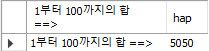

### WHILE문의 응용

* **ITERATE[레이블]**: 지정한 레이블로 가서 계속 진행한다.
* **LEAVE[레이블]**: 지정한 레이블을 빠져나간다. WHILE문이 종료됨

In [ ]:
# WHILE문 응용, ITERATE, LEAVE문
DROP PROCEDURE IF EXISTS whileProc2;
DELIMITER $$
CREATE PROCEDURE whileProc2()
BEGIN
	DECLARE i INT;
    DECLARE hap INT;
    SET i = 1;
    SET hap = 0;
    
    myWhile:
    WHILE (i <= 100) DO
        # i가 4의 배수라면 i를 1증가시키고 ITERATE를 만나 계속 진행
		IF (i % 4 = 0) THEN
			SET i = i + 1;
            # 지정한 label문으로 가서 계속 진행
            ITERATE myWhile;
		END IF;
        SET hap = hap + i;
        # hap이 1000을 초과하면 LEAVE를 만나서 myWhile레이블을 빠져나감
        IF (hap > 1000) THEN
            # 지정한 label문을 떠남. while문 종료
			LEAVE myWhile;
		END IF;
        SET i = i + 1;
	END WHILE;
    SELECT '1부터 100까지의 합(4의 배수 제외), 1000넘으면 종료 ==>', hap;
END $$
DELIMITER ;
CALL whileProc2();

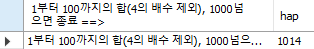

## 동적 SQL

* 동적 SQL을 사용하면 변경되는 내용을 실시간으로 적용시켜 사용할 수 있다.

### PREPARE와 EXECUTE

* PREPARE는 SQL문을 실행하지는 않고 미리 준비만 해놓고, EXECUTE는 준비한 SQL문을 실행한다.
* 실행 후에는 DEALLOCATE PREPARE로 문장을 해제해주는 것이 바람직하다.

In [ ]:
# PREPARE와 EXECUTE 예제
use market_db;
PREPARE myQuery FROM 'SELECT * FROM member WHERE mem_id = "BLK"';
EXECUTE myQuery;
DEALLOCATE PREPARE myQuery;

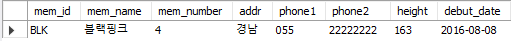

### 동적 SQL의 활용

* 실무에서 종종 다음과 같은 경우가 발생한다.
* 보안이 중요한 출입문에서는 출입한 내역을 테이블에 기록해 놓는데, 이때 출입증을 태그하는 순간의 날짜와 시간이 INSERT문으로 만들어져서 입력되도록 해야 한다.

In [ ]:
# 동적 SQL 활용예시
DROP TABLE IF EXISTS gate_table;
CREATE TABLE gate_table (id INT AUTO_INCREMENT PRIMARY KEY, entry_time DATETIME);
# 현재 날짜와 시간을 @curDate변수에 저장
SET @curDate = CURRENT_TIMESTAMP();
# ?을 사용해서 entry_time에 입력할 값을 비워놓는다
PREPARE myQuery FROM 'INSERT INTO gate_table VALUES(NULL, ?)';
# 이 SQL을 실행한 시점의 날짜와 시간이 입력된다
EXECUTE myQuery USING @curDate;
DEALLOCATE PREPARE myQuery;
SELECT * FROM gate_table;

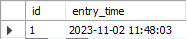